# Imports


In [8]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
from scripts.clusterer import CluStream
from scripts.dynamic_clusterer import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

In [10]:
colors = get_colors()


def import_and_shuffle_csv(file_path):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [11]:
file_path, drift_type = "./data/final_2d_data_brightness.csv", "BRIGHTNESS"
# file_path, drift_type = './data/final_2d_data_contrast.csv', 'CONTRAST'
# file_path, drift_type = './data/final_2d_data_saturation.csv', 'SATURATION'
# file_path, drift_type = './data/final_2d_data_gaussian_noise.csv', 'GAUSSIAN_NOISE'
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [12]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-10, 20),
        y_limits=(0, 15),
        threshold=threshold,
    )

    return dynamic_clusterer

New model created - id: 80041
(id: 0 - cen: [5.15 7.14] - rad: 1.19)
(id: 1 - cen: [3.58 3.02] - rad: 1.28)
<!> Change detected! Possible input drift at timestamp 16 ----> Apply macroclustering <!>



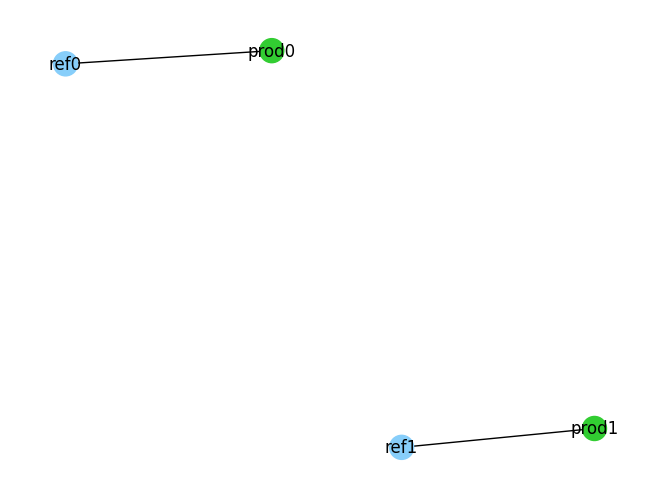

(id: 0 - cen: [5.15 7.14] - rad: 1.19) SURVIVED as (id: 0 - cen: [5.28 7.06] - rad: 1.31) (score: 0.9582499179854019)
(id: 1 - cen: [3.58 3.02] - rad: 1.28) SURVIVED as (id: 1 - cen: [3.61 2.94] - rad: 1.29) (score: 0.9766643837025034)
Final macroclusters:
(id: 0 - cen: [5.28 7.06] - rad: 1.31)
(id: 1 - cen: [3.61 2.94] - rad: 1.29)

-----------------------------------------------------------------------------------



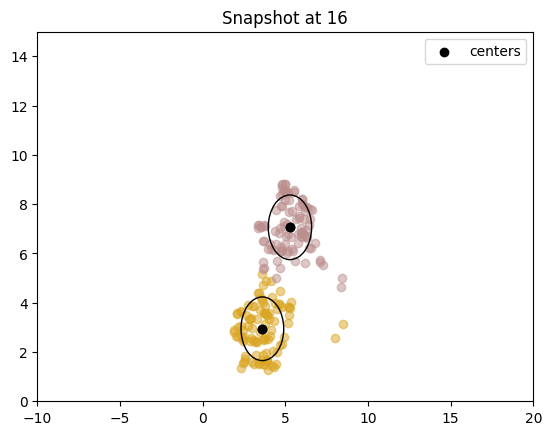

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 208 ----> Apply macroclustering <!>



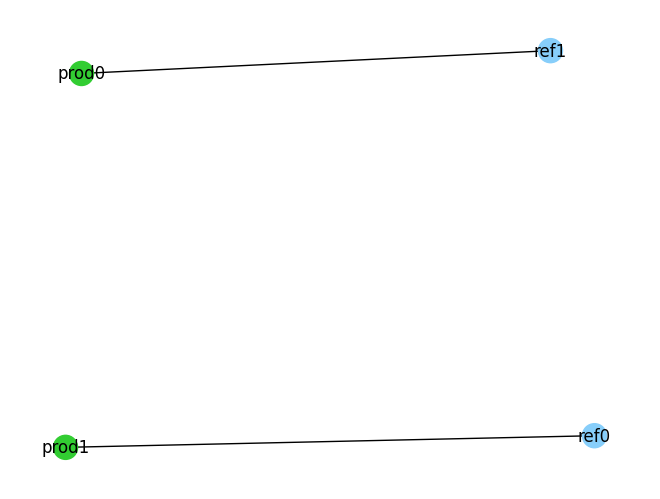

(id: 1 - cen: [3.61 2.94] - rad: 1.29) SURVIVED as (id: 1 - cen: [4.24 2.54] - rad: 1.26) (score: 0.8171780631288474)
(id: 0 - cen: [5.28 7.06] - rad: 1.31) SURVIVED as (id: 0 - cen: [5.93 6.63] - rad: 1.42) (score: 0.8198032291776391)
Final macroclusters:
(id: 0 - cen: [5.93 6.63] - rad: 1.42)
(id: 1 - cen: [4.24 2.54] - rad: 1.26)

-----------------------------------------------------------------------------------



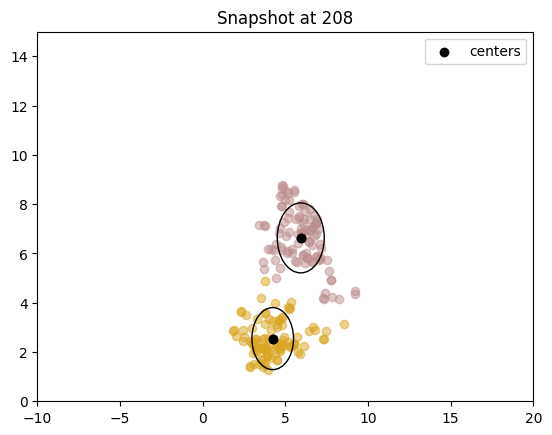

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 324 ----> Apply macroclustering <!>



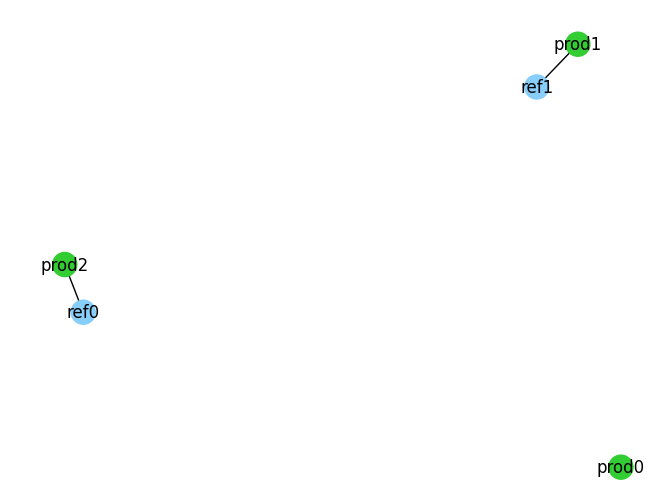

(!) (id: 2 - cen: [8.08 4.22] - rad: 1.17) APPEARED --- (score: 0.5782413374294839)
(id: 1 - cen: [4.24 2.54] - rad: 1.26) SURVIVED as (id: 1 - cen: [4.34 2.58] - rad: 1.52) (score: 0.9733749018770129)
(id: 0 - cen: [5.93 6.63] - rad: 1.42) SURVIVED as (id: 0 - cen: [5.27 7.14] - rad: 1.16) (score: 0.798213194966736)
Final macroclusters:
(id: 0 - cen: [5.27 7.14] - rad: 1.16)
(id: 1 - cen: [4.34 2.58] - rad: 1.52)
(id: 2 - cen: [8.08 4.22] - rad: 1.17)

-----------------------------------------------------------------------------------



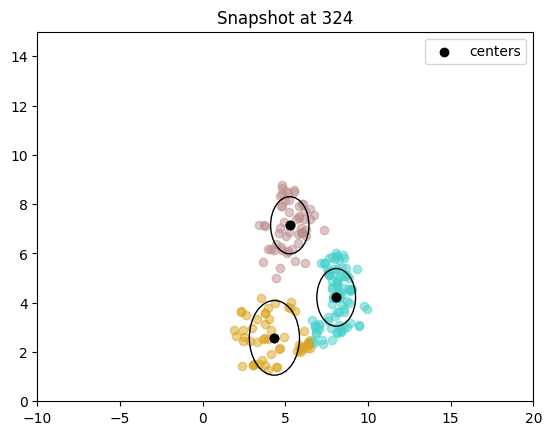

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 499 ----> Apply macroclustering <!>



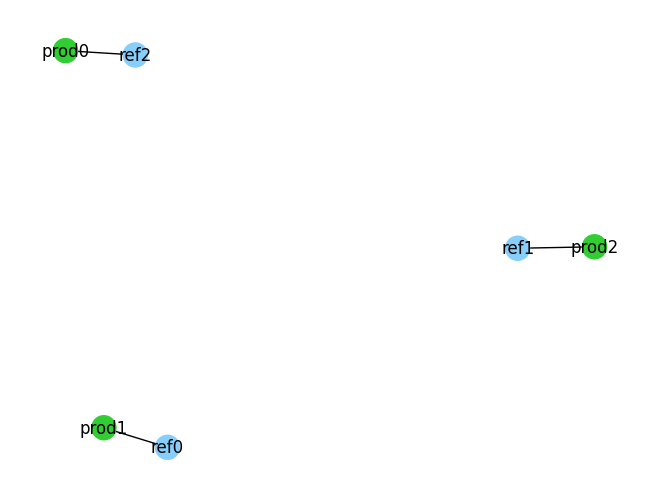

(id: 2 - cen: [8.08 4.22] - rad: 1.17) SURVIVED as (id: 2 - cen: [8.44 3.81] - rad: 1.4) (score: 0.8620531566122848)
(id: 0 - cen: [5.27 7.14] - rad: 1.16) SURVIVED as (id: 0 - cen: [5.3  7.06] - rad: 1.2) (score: 0.9751431406718231)
(id: 1 - cen: [4.34 2.58] - rad: 1.52) SURVIVED as (id: 1 - cen: [3.98 2.75] - rad: 1.4) (score: 0.9092277405224629)
Final macroclusters:
(id: 0 - cen: [5.3  7.06] - rad: 1.2)
(id: 1 - cen: [3.98 2.75] - rad: 1.4)
(id: 2 - cen: [8.44 3.81] - rad: 1.4)

-----------------------------------------------------------------------------------



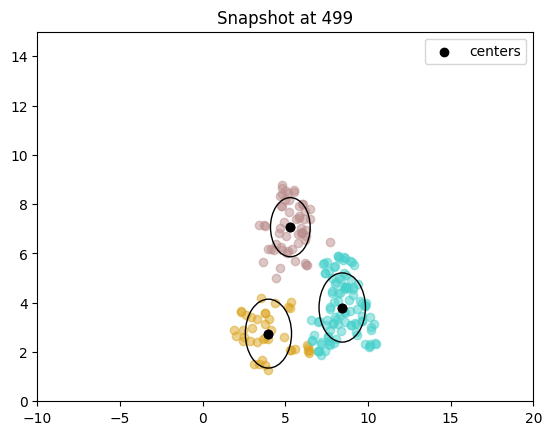

<Figure size 1000x1000 with 0 Axes>

Batch Finished ----> Apply macroclustering



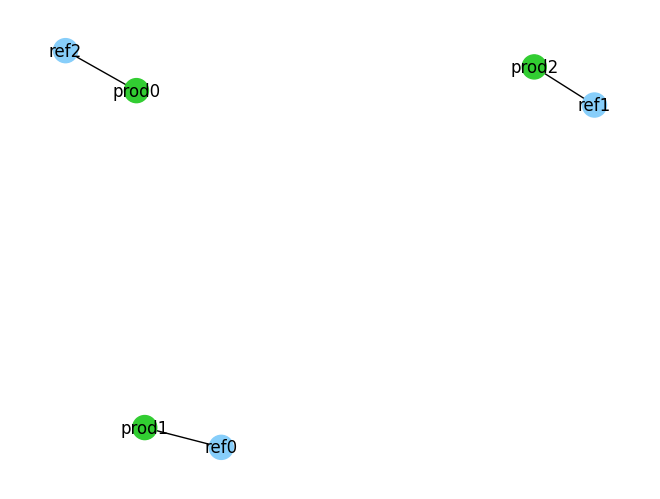

(id: 2 - cen: [8.44 3.81] - rad: 1.4) SURVIVED as (id: 2 - cen: [9.3  3.31] - rad: 1.17) (score: 0.7653484556934729)
(id: 0 - cen: [5.3  7.06] - rad: 1.2) SURVIVED as (id: 0 - cen: [5.23 7.14] - rad: 1.15) (score: 0.9689953188587777)
(id: 1 - cen: [3.98 2.75] - rad: 1.4) SURVIVED as (id: 1 - cen: [3.56 2.85] - rad: 1.14) (score: 0.8883632791041661)
Final macroclusters:
(id: 0 - cen: [5.23 7.14] - rad: 1.15)
(id: 1 - cen: [3.56 2.85] - rad: 1.14)
(id: 2 - cen: [9.3  3.31] - rad: 1.17)

-----------------------------------------------------------------------------------



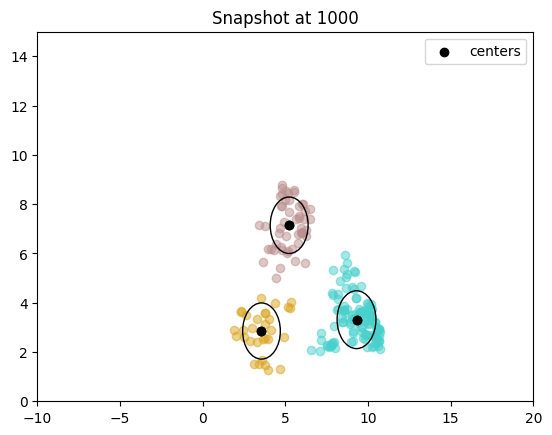

<Figure size 1000x1000 with 0 Axes>

In [13]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(plot_img=True, print_graph=True, macroclustering_at_end=True)

# clustream.draw_snapshots()
clustream.draw_gif(title=drift_type)

In [14]:
# Clean directory

for id in ids:
    ids.remove(id)
    clean_directory(f"./plots/{id}")
    print(f"Deleted {id}")


Directory './plots/80041' and its contents removed successfully.
Deleted 80041
